# Chapter2: 線形計画と凸2次計画

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1
(問) 1.1節の例1.2の輸送問題を線形計画問題として定式化せよ.

(答) 
$\begin{aligned}
\text{Minimize } & x_{11} + 2x_{12} + 3x_{13} + 4x_{21} + 8x_{22} + 7x_{23} \\
\text{subject to } & x_{11} + x_{12} + x_{13} \le 20,\\
& x_{21} + x_{22} + x_{23} \le 15,\\
& x_{11} + x_{21} = 8.5,\\
& x_{12} + x_{22} = 12.5,\\
& x_{13} + x_{23} = 14,\\
& x_{11}, x_{12}, x_{13}, x_{21}, x_{22}, x_{23} \ge 0.
\end{aligned}$

In [4]:
# solving by cvxpy
x = cp.Variable(6)
obj = cp.Minimize(x[0] + 2*x[1] + 3*x[2] + 4* x[3] + 8*x[4] + 7*x[5])
constraints = [x[0] + x[1] + x[2] <= 20,
               x[3] + x[4] + x[5] <= 15,
               x[0] + x[3] == 8.5,
               x[1] + x[4] == 12.5,
               x[2] + x[5] == 14,
               x >= 0]
prob = cp.Problem(obj, constraints)
prob.solve() 
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status: optimal
optimal value 127.00000000256257
optimal var [2.33008413e-09 1.25000000e+01 7.50000000e+00 8.50000000e+00
 2.07574270e-10 6.50000000e+00]


In [3]:
# solving by cvxpy
x = cp.Variable(8)
obj = cp.Minimize(x[0] + 2*x[1] + 3*x[2] + 4* x[3] + 8*x[4] + 7*x[5])
constraints = [x[0] + x[1] + x[2] + x[6] == 20,
               x[3] + x[4] + x[5] + x[7] == 15,
               x[0] + x[3] == 8.5,
               x[1] + x[4] == 12.5,
               x[2] + x[5] == 14,
               x >= 0]
prob = cp.Problem(obj, constraints)
prob.solve() 
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status: optimal
optimal value 127.0000000025707
optimal var [ 2.33007646e-09  1.25000000e+01  7.50000000e+00  8.50000000e+00
  2.07527216e-10  6.50000000e+00 -3.34244944e-11  4.42880856e-11]


## 2.2
(問) 次の線形計画問題を等式標準形に直せ.

(i)
$\begin{aligned}
    \text{Maximize } &-x_{1} + 4x_{2} \\
    \text{subject to } &x_{1} + 3x_{2} \ge 3,\\
    & -2x_{1} + x_{2} \le 2,\\
    & x_{1}, x_{2} \ge 0.
    \end{aligned}$

(ii)
$\begin{aligned}
    \text{Minimize } &x_{1} + 2x_{2} + x_{3}\\
    \text{subject to } &x_{1} + 2x_{2} + 4x_{3} = 6,\\
    & 5x_{1} + 4x_{2} \ge 20,\\
    & x_{2} \ge 0.
    \end{aligned}$

(答)
スラック変数を導入し、以下のような等式標準形にする
$\begin{aligned}
\text{Minimize } &\bm{c}^{\top}\bm{x}\\
\text{subject to } &A\bm{x} = \bm{b},\\
& \bm{x} \ge 0.
\end{aligned}$

(i)
$\begin{aligned}
\text{Minimize } &
\left[
    \begin{matrix} 1 \\ -4 \\ 0 \\ 0 \end{matrix}
\right]^{\top}
\left[
    \begin{matrix} x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \end{matrix}
\right]\\
\text{subject to } &
\left[
    \begin{matrix} 1 & 3 & -1 & 0 \\ -2 & 1 & 0 & 1 \end{matrix}
\right] 
\left[
    \begin{matrix} x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \end{matrix}
\right] =
\left[
    \begin{matrix} 3 \\ 2 \end{matrix}
\right],\\
& 
\left[
    \begin{matrix} x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \end{matrix}
\right] \ge \bm{0}.
\end{aligned}$

(ii)

$\begin{aligned}
\text{Minimize } &
\left[
    \begin{matrix} 1 \\ -1 \\ 2 \\ 1 \\ -1 \\ 0 \end{matrix}
\right]^{\top}
\left[
    \begin{matrix} x_{1}^{+} \\ x_{1}^{-} \\ x_{2} \\ x_{3}^{+} \\ x_{3}^{-} \\ x_{4} \end{matrix}
\right]\\
\text{subject to } &
\left[
    \begin{matrix} 1 & -1 & 2 & 4 & -4 & 0 \\ 5 & -5 & 4 & 0 & 0 & -1 \end{matrix}
\right] 
\left[
    \begin{matrix} x_{1}^{+} \\ x_{1}^{-} \\ x_{2} \\ x_{3}^{+} \\ x_{3}^{-} \\ x_{4} \end{matrix}
\right] =
\left[
    \begin{matrix} 6 \\ 20 \end{matrix}
\right],\\
& 
\left[
    \begin{matrix} x_{1}^{+} \\ x_{1}^{-} \\ x_{2} \\ x_{3}^{+} \\ x_{3}^{-} \\ x_{4} \end{matrix}
\right] \ge \bm{0}.
\end{aligned}$

In [77]:
# (i)
x = cp.Variable(2)
obj = cp.Maximize(-x[0] + 4*x[1])
cons = [x[0] + 3 * x[1] >= 3, -2*x[0] + x[1] <= 2]
P = cp.Problem(obj, cons)
P.solve()
print(P.status)
print(x.value)

unbounded
None


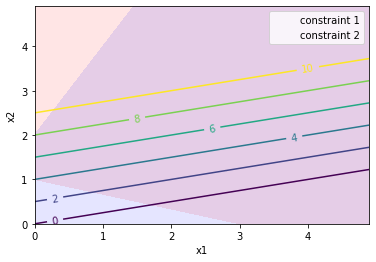

In [3]:
# visualize (i)
x1 = np.arange(0, 5, 0.1)
x2 = np.arange(0, 5, 0.1)
x1, x2 = np.meshgrid(x1, x2)
obj = -x1 + 4*x2
cons1 = x1 + 3 * x2
cons2 = -2*x1 + x2
CS_obj = plt.contour(x1, x2, obj, np.arange(0, 11, 2))
CS_cons1 = plt.contourf(x1, x2, cons1, [3, 100], colors = 'red', alpha=0.1)
CS_cons2 = plt.contourf(x1, x2, cons2, [-100, 2], colors = 'blue', alpha=0.1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.clabel(CS_obj)
CS_cons1.collections[0].set_label('constraint 1')
CS_cons2.collections[0].set_label('constraint 2')
plt.legend()
plt.show()

In [29]:
# (ii) normalized
x = cp.Variable(6)
c = np.array([1, -1, 2, 1, -1, 0]).T
A = np.array([[1, -1, 2, 4, -4, 0], [5, -5, 4, 0, 0, -1]])
b = np.array([6, 20]).T

obj = cp.Minimize(c.T @ x)
cons = [A @ x == b, x >= 0]
P_normal = cp.Problem(obj, cons)
P_normal.solve()
print(P_normal.status)
print(x.value)
print(cons[0].dual_value, cons[1].dual_value)

optimal
[ 4.26915714e+00  2.69157139e-01 -3.25395644e-11  1.70714822e+00
  1.20714822e+00  4.90569734e-09]
[-0.25 -0.15] [4.53313031e-11 4.07596678e-10 9.00000000e-01 1.44066397e-10
 2.68218217e-10 1.50000000e-01]


In [22]:
# (ii) original
x = cp.Variable(3)
obj = cp.Minimize(x[0] + 2 * x[1] + x[2])
const = [x[0] + 2*x[1] + 4*x[2] == 6, 5*x[0] + 4*x[1] >= 20, x[1] >= 0]
P = cp.Problem(obj, const)
P.solve()
print(P.status)
print(x.value)

optimal
[ 4.00000000e+00 -1.79694098e-11  5.00000000e-01]


## 2.3 
(問) 練習問題2.2の線形計画問題の双対問題を導け.

ラグランジュ双対問題を示す.
等式標準形
$\begin{aligned}
\text{Minimize } &\bm{c}^{\top}\bm{x}\\
\text{subject to } &A\bm{x} = \bm{b},\\
& \bm{x} \ge 0.
\end{aligned}$

から$A^{\top}\bm{y} \le \bm{c}$として下界
$$\bm{c}^{\top}\bm{x} = \bm{x}^{\top}\bm{c} \ge \bm{x}^{\top}A^{\top}\bm{y} = \bm{b}^{\top}\bm{y}$$
の最大化で双対問題
$\begin{aligned}
\text{Maximize } &\bm{b}^{\top}\bm{y}\\
\text{subject to } &A^{\top}\bm{y} \le \bm{c}\\
\end{aligned}$
を得る

(答)

(i)
$\begin{aligned}
\text{Maximize } &
\left[
    \begin{matrix} 3 \\ 2 \end{matrix}
\right]^{\top}
\left[
    \begin{matrix} y_{1} \\ y_{2} \end{matrix}
\right]\\
\text{subject to } &
\left[
    \begin{matrix} 1 & 3 & -1 & 0 \\ -2 & 1 & 0 & 1 \end{matrix}
\right]^{\top}
\left[
    \begin{matrix} y_{1} \\ y_{2} \end{matrix}
\right] \le
\left[
    \begin{matrix} 1 \\ -4 \\ 0 \\ 0 \end{matrix}
\right]
\end{aligned}$

(ii)

$\begin{aligned}
\text{Maximize } &
\left[
    \begin{matrix} 6 \\ 20 \end{matrix}
\right]^{\top}
\left[
    \begin{matrix} y_{1} \\ y_{2} \end{matrix}
\right]\\
\text{subject to } &
\left[
    \begin{matrix} 1 & -1 & 2 & 4 & -4 & 0 \\ 5 & -5 & 4 & 0 & 0 & -1 \end{matrix}
\right]^{\top}
\left[
    \begin{matrix} y_{1} \\ y_{2} \end{matrix}
\right] \le
\left[
    \begin{matrix} 1 \\ -1 \\ 2 \\ 1 \\ -1 \\ 0 \end{matrix}
\right]
\end{aligned}$

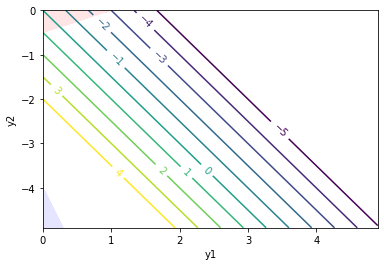

In [97]:
# visualize (i)
y1 = np.arange(0, 5, 0.1)
y2 = np.arange(-4.9, 0.1, 0.1)
y1, y2 = np.meshgrid(y1, y2)

obj = -3 * y1 - 2 * y2
cons1 = y1 - 2 * y2
cons2 = 3 * y1 + y2 

CS = plt.contour(y1, y2, obj, np.arange(-5, 5))
plt.contourf(y1, y2, cons1, [-100,1], colors = 'red', alpha = 0.1)
plt.contourf(y1, y2, cons2, [-100, -4], colors = 'blue', alpha = 0.1)
plt.clabel(CS)
plt.xlabel('y1')
plt.ylabel('y2')
plt.show()

In [94]:
# solve (i)
y = cp.Variable(2)

obj = cp.Maximize(np.array([3, 2]) @ y)
cons = [y[0] - 2 * y[1] <= 1,
        3 * y[0] + y[1] <= -4,
        y[0] >= 0,
        y[1] <= 0]
P = cp.Problem(obj, cons)
P.solve()
print(P.status)
print(y.value)

infeasible
None


In [31]:
# solve (ii)
y = cp.Variable(2)
c = np.array([1, -1, 2, 1, -1, 0]).T
A = np.array([[1, -1, 2, 4, -4, 0], [5, -5, 4, 0, 0, -1]])
b = np.array([6, 20]).T

obj = cp.Minimize(b.T @ y)
cons = [A.T @ y <= c]
P_normal = cp.Problem(obj, cons)
P_normal.solve()
print(P_normal.status)
print(y.value)
print(cons[0].dual_value)

optimal
[0.25 0.15]
[3.17146269e-01 4.31714627e+00 4.03781548e-10 1.27234749e+00
 1.77234749e+00 1.02707161e-09]


## 2.4 
(問) 2.3.1節では線形計画問題(2.15)の実行可能基底解が得られていることを前提に,単体法の一反復を説明した.実行可能基底解を得るためにしばしば次の線形計画問題が利用される.
$\begin{aligned}
\text{Minimize } &\bm{1}^{\top}\bm{z} \\
\text{subject to } &A\bm{x} + \bm{z} = \bm{b}, \\
& \bm{x} \ge \bm{0}, \bm{z} \ge \bm{0}
\end{aligned}$
ただし, $\bm{b}\ge\bm{0}$.ここで, $\bm{z}$を基底変数とするこの問題の実行可能基底解はどのようなものか. また, この問題の最適解と問題(2.15)の実行可能基底解とにはどのような関係があるか.

(答)
- $\bm{z}$を基底変数とすると$\bm{x} = \bm{0}$より, この問題の実行可能基底解は$\bm{z}= \bm{b}$.
- この問題を単体法で解いた最適解で$\bm{z}=\bm{0}$ならそのときの$\bm{x}$が問題(2.15)の実行可能基底解である. 解の$\bm{z}$のうちどれかの成分が正であれば制約式を満たすことができないため,元の問題に実行可能解は存在しない

In [3]:
# assume following problem 
x = cp.Variable(2)
c = np.array([1, 1]).T
A = np.array([
    [0, 2],
    [0.5, -1], 
    [2, 3]
])
b = np.array([10, 0.5, 20]).T
obj = cp.Maximize(c.T @ x)
P = cp.Problem(obj, [A @ x <= b, x >= 0])
P.solve()
print(P.status)
print(P.value)
print(x.value)

infeasible
-inf
None


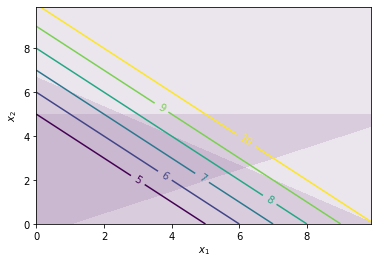

In [6]:
def visualize_cp2d(c, A, b):
    """
    visualize 2D linear programming problem
    c, A, b are np.ndarray in normal form of problem
    """
    x1, x2 = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1)) # todo: decide range
    obj = c[0] * x1 + c[1] * x2
    CS = plt.contour(x1, x2, obj, np.arange(5, 11)) # todo: decide range
    for i, row in enumerate(A):
        cons = row[0] * x1 + row[1] * x2 
        plt.contourf(x1, x2, cons, [-float('inf'), b[i]], alpha = 0.1)

    plt.clabel(CS)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

visualize_cp2d(c, A, b)

In [7]:
def basic_solution(A, b):
    """
    derive basic solution of linear programming problem
    A, b are np.ndarray in normal form of problem
    """
    x = cp.Variable(A.shape[1])
    z = cp.Variable(len(b))
    obj = cp.Minimize(cp.sum(z))

    P = cp.Problem(obj, [A @ x + z == b, x >= 0, z >= 0])
    P.solve()

    print(P.status)
    print('P:', P.value)
    print('x:', x.value)
    print('z:', z.value)
    return x.value
basic_solution(A, b)
# z is positive but there are feasible solution!! (when A has more rows than columns)

optimal
P: 4.250000000293328
x: [2.5 5. ]
z: [1.53765777e-09 4.25000000e+00 8.08928344e-11]


array([2.5, 5. ])


## 2.5
次の最適化問題を線形計画問題か凸2次計画問題のいずれかに帰着せよ. ただし, $\gamma$, $\rho$は正の定数である.

(i) チェビシェフ近似問題

(問) $$\text{Minimize } \|A\bm{x}-\bm{b}\|_{\infty}$$
(答)
$\begin{aligned}
\text{Minimize } &y\\
\text{subject to } &A\bm{x}-\bm{b} \le \bm{1}y \\
&- A\bm{x} + \bm{b} \le \bm{1}y
\end{aligned}$

(ii) $\ell_{1}$ノルム正則化付きチェビシェフ近似問題

(問) $$\text{Minimize } \|A\bm{x}-\bm{b}\|_{\infty} + \gamma\|\bm{x}\|_{1}$$
(答)
$\begin{aligned}
\text{Minimize } &y + \gamma\bm{1}^{\top}\bm{z}\\
\text{subject to } &A\bm{x}-\bm{b} \le \bm{1}y \\
&- A\bm{x} + \bm{b} \le \bm{1}y \\
& \bm{z} \ge \bm{x} \\
&  \bm{z} \ge -\bm{x} \\
\end{aligned}$

(iii) ティコノフ正則化付きチェビシェフ近似問題

(問) $$\text{Minimize } \|A\bm{x}-\bm{b}\|_{\infty}+ \gamma\|\bm{x}\|_{2}^{2}$$
(答)
$\begin{aligned}
\text{Minimize } &y + \frac{1}{2}\bm{x}^{\top}(2\gamma I)\bm{x}\\
\text{subject to } &A\bm{x}-\bm{b} \le \bm{1}y \\
&- A\bm{x} + \bm{b} \le \bm{1}y 
\end{aligned}$

(iv) エラスティックネット正則化付き最小2乗法

(問) $$\text{Minimize } \|A\bm{x}-\bm{b}\|_{2}^{2} + \gamma\|\bm{x}\|_{2}^{2} + \rho\|\bm{x}\|_{1}$$
(答)
$\begin{aligned}
\text{Minimize } &\frac{1}{2}\bm{x}^{\top}2(A^{\top}\bm{A} -\gamma\bm{I})\bm{x} - 2\bm{b}^{\top}A\bm{x} + \rho\bm{1}^{\top}\bm{z}\\
\text{subject to } & \bm{z} \ge \bm{x} \\
&  \bm{z} \ge -\bm{x} \\
\end{aligned}$

## 2.6
(問) 

(i) 問題(2.45)を問題(2.33)の形に直したとき, $Q, A, \bm{b}, \bm{c}$はどのようになるか.

問題(2.45)
$\begin{aligned}
\text{Minimize }&\bm{w}^{\top}\bm{w} + \gamma\sum_{l=1}^{r}e_{l} \\
\text{subject to }& t_{l}(\bm{s}_{l}^{\top}\bm{w}+v) + e_{l} \ge 1, & l = 1, \dots, r\\
& e_{l} \ge 0, & l = 1, \dots, r 
\end{aligned}$
問題(2.33)
$\begin{aligned}
\text{Minimize }& \frac{1}{2}\bm{x}^{\top}Q\bm{x} + \bm{c}^{\top} \bm{x} \\
\text{subject to }& A\bm{x} = \bm{b}\\
& \bm{x} \ge \bm{0}
\end{aligned}$

(ii) 問題(2.43)において関数$\phi$を
$$
\phi(z)=
\begin{cases}
0 & (z \ge 1\text{ のとき}) \\
(z-1)^{2} & (z < 1\text{ のとき})
\end{cases}
$$
で定義する.このとき, 問題(2.43)を凸2次計画問題(2.33)の形に直せ


問題(2.43)
$$\text{Minimize } \bm{w}^{\top}\bm{w} + \gamma\sum_{l=1}^{r}\phi(t_{l}(\bm{s}_{l}^{\top}\bm{w}+v)) $$

(答)

(i)  
Let $\bm{u}$ be a slack variable.
$$\bm{x} = \left[\begin{matrix} \bm{w}^{+} \\ \bm{w}^{-} \\ v^{+} \\ v^{-} \\ \bm{e} \\ \bm{u}\end{matrix}\right], 
Q = \left[\begin{matrix} 
2I & -2I & O & O & O & O\\
-2I & 2I & O & O & O & O\\
O & O & O & O & O & O\\
O & O & O & O & O & O\\
O & O & O & O & O & O\\
O & O & O & O & O & O
\end{matrix}\right],
A = \left[\begin{matrix}
\begin{matrix}t_{1}\bm{s}_{1}^{\top} \\ \vdots \\ t_{r}\bm{s}_{r}^{\top} \end{matrix} &  
\begin{matrix}-t_{1}\bm{s}_{1}^{\top} \\ \vdots \\ -t_{r}\bm{s}_{r}^{\top} \end{matrix} &
\bm{t} & -\bm{t} & I & -I
\end{matrix}\right],
\bm{b} = \bm{1},
\bm{c} = \left[\begin{matrix} 
O\\
O\\
O\\
O\\
\gamma \bm{1} \\
O
\end{matrix}\right]
$$

(ii)
$\phi$ can be considered as
$$\phi(z)=\min_{e}\{e^{2}|z + e \ge 1, e \ge 0 \}$$
Then, the problem is 
$\begin{aligned}
\text{Minimize }&\bm{w}^{\top}\bm{w} + \gamma\|\bm{e}\|_{2}^{2} \\
\text{subject to }& t_{l}(\bm{s}_{l}^{\top}\bm{w}+v) + e_{l} \ge 1, & l = 1, \dots, r\\
& e_{l} \ge 0, & l = 1, \dots, r 
\end{aligned}$

Hence, 
$$\bm{x} = \left[\begin{matrix} \bm{w}^{+} \\ \bm{w}^{-} \\ v^{+} \\ v^{-} \\ \bm{e} \\ \bm{u}\end{matrix}\right], 
Q = \left[\begin{matrix} 
2I & -2I & O & O & O & O\\
-2I & 2I & O & O & O & O\\
O & O & O & O & O & O\\
O & O & O & O & O & O\\
O & O & O & O & 2\gamma I & O\\
O & O & O & O & O & O
\end{matrix}\right],
A = \left[\begin{matrix}
\begin{matrix}t_{1}\bm{s}_{1}^{\top} \\ \vdots \\ t_{r}\bm{s}_{r}^{\top} \end{matrix} &  
\begin{matrix}-t_{1}\bm{s}_{1}^{\top} \\ \vdots \\ -t_{r}\bm{s}_{r}^{\top} \end{matrix} &
\bm{t} & -\bm{t} & I & -I
\end{matrix}\right],
\bm{b} = \bm{1},
\bm{c} = \left[\begin{matrix} 
O\\
O\\
O\\
O\\
O\\
O
\end{matrix}\right]
$$
